In [1]:
import sys
sys.path.append("../")

import numpy as np
import torch
from matplotlib import pyplot as plt

from fwi import FWI, smoothing
from model import marmousi

0.0% - 54.6%


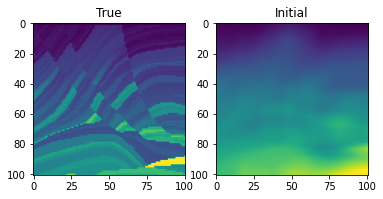

In [17]:
true_model = marmousi()
init_model = smoothing(torch.tensor(true_model), mode='mean', h=20, w=20).numpy()
plt.figure()
plt.subplot(121)
plt.imshow(true_model)
ax = plt.gca()
ax.set_title("True")
plt.subplot(122)
plt.imshow(init_model)
ax = plt.gca()
ax.set_title("Initial")
error = np.abs(init_model - true_model) / true_model
print(f'{error.min():.1%} - {error.max():.1%}')

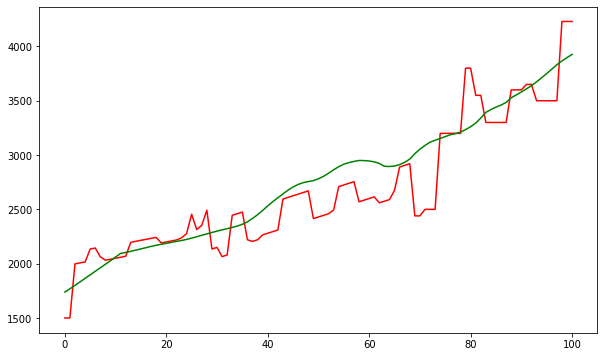

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(true_model[:, 50], c='r')
plt.plot(init_model[:, 50], c='g')

In [4]:
sources_x = np.array([[1, i] for i in range(1, 101, 2)])
receivers_x = np.array([[0, i] for i in range(0, 101)])

In [5]:
fwi = FWI(true_model, init_model, sources_x, receivers_x)

In [6]:
batch_size = 8
max_niters = 10
# lr_list = [1e7, 3e7, 1e8, 3e8]
# loss = []
# model = []
# for lr in lr_list:
#     loss_list, model = fwi.train(lr=lr, batch_size=batch_size, max_niters=max_niters, print_interval=10)
#     loss.append(loss_list)
#     model.append(model)
lr = 3
loss, model = fwi.train(lr=lr, batch_size=batch_size, max_niters=max_niters, print_interval=1)

Training begin
epoch: 1, data loss: 2.36426, 51.0s,                     model loss: 0.0%-55.0%
epoch: 2, data loss: 1.84065, 49.4s,                     model loss: 0.0%-55.1%
epoch: 3, data loss: 1.40606, 49.5s,                     model loss: 0.0%-55.2%
epoch: 4, data loss: 1.05595, 49.2s,                     model loss: 0.0%-55.6%
epoch: 5, data loss: 0.791299, 49.2s,                     model loss: 0.0%-56.0%
epoch: 6, data loss: 0.602018, 49.3s,                     model loss: 0.0%-56.4%
epoch: 7, data loss: 0.46847, 49.2s,                     model loss: 0.0%-56.8%
epoch: 8, data loss: 0.374563, 49.4s,                     model loss: 0.0%-57.0%
epoch: 9, data loss: 0.306224, 49.4s,                     model loss: 0.0%-57.2%
epoch: 10, data loss: 0.256574, 49.2s,                     model loss: 0.0%-57.3%
Training finished, total time0.0s


In [11]:
error = (model - init_model)

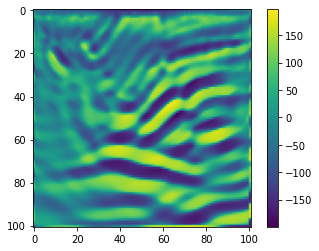

In [12]:
plt.imshow(error)
plt.colorbar()

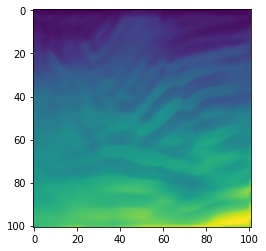

In [13]:
plt.imshow(model)

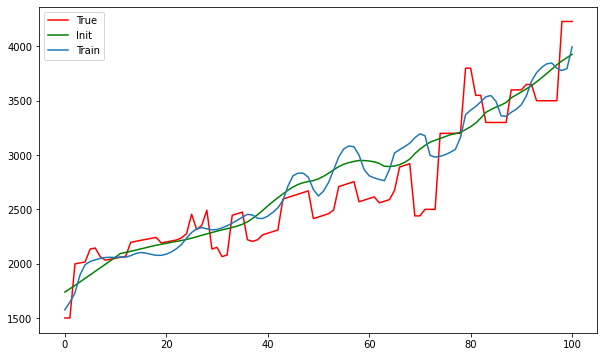

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(true_model[:, 50], c='r', label='True')
plt.plot(init_model[:, 50], c='g', label='Init')
plt.plot(model[:, 50], label='Train')
plt.legend()

0.0% - 69.6%
